# Import Esential Libraries

In [137]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
%matplotlib inline

# Technical Analysis using the `ta` library
import ta
from ta import add_all_ta_features
from ta.utils import dropna  # Helps in dropping NaN values

# Backtesting
import backtrader as bt

In [138]:
df = pd.read_csv('stockDetails.csv')
df.head()

,Date,Symbol,Open,High,Low,Close,Volume,Turnover
0,2007-11-27,MUNDRAPORT,770.00,1050.00,770.0,962.90,27294366,2687719053785000
1,2007-11-28,MUNDRAPORT,984.00,990.00,874.0,893.90,4581338,431276530165000
2,2007-11-29,MUNDRAPORT,909.00,914.75,841.0,884.20,5124121,455065846265000
3,2007-11-30,MUNDRAPORT,890.00,958.00,890.0,921.55,4609762,428325662830000
4,2007-12-03,MUNDRAPORT,939.75,995.00,922.0,969.30,2977470,287519974300000


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3322 non-null   object 
 1   Symbol    3322 non-null   object 
 2   Open      3322 non-null   float64
 3   High      3322 non-null   float64
 4   Low       3322 non-null   float64
 5   Close     3322 non-null   float64
 6   Volume    3322 non-null   int64  
 7   Turnover  3322 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 207.8+ KB


In [140]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3322 non-null   datetime64[ns]
 1   Symbol    3322 non-null   object        
 2   Open      3322 non-null   float64       
 3   High      3322 non-null   float64       
 4   Low       3322 non-null   float64       
 5   Close     3322 non-null   float64       
 6   Volume    3322 non-null   int64         
 7   Turnover  3322 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 207.8+ KB


In [141]:
df.describe()

,Date,Open,High,Low,Close,Volume,Turnover
count,3322,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03
mean,2014-08-14 03:47:08.416616448,344.763019,351.608007,337.531969,344.201626,2.954564e+06,1.070144e+14
min,2007-11-27 00:00:00,108.000000,110.450000,105.650000,108.000000,1.236600e+04,2.415857e+11
25%,2011-04-07 06:00:00,164.850000,168.000000,161.600000,164.312500,7.493682e+05,1.817650e+13
50%,2014-08-06 12:00:00,325.750000,331.275000,319.850000,324.700000,2.007292e+06,5.836041e+13
75%,2017-12-18 18:00:00,401.000000,407.187500,395.000000,400.912500,3.636883e+06,1.158526e+14
max,2021-04-30 00:00:00,1310.250000,1324.000000,1270.000000,1307.450000,9.771788e+07,8.160988e+15
std,NaN,193.619992,198.617808,188.676614,193.045886,4.104227e+06,2.625564e+14


In [142]:
# Dropping rows with NaN values and adding technical analysis features
df = dropna(df)

# Moving averages
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()

# RSI
df['RSI_14'] = ta.momentum.rsi(df['Close'], window=14)

# Bollinger Bands (fix by adding SMA_20 first)
df['SMA_20'] = df['Close'].rolling(window=20).mean()  # Add the 20-period SMA
df['Bollinger_High'] = df['SMA_20'] + (df['Close'].rolling(window=20).std() * 2)
df['Bollinger_Low'] = df['SMA_20'] - (df['Close'].rolling(window=20).std() * 2)

# MACD
df['MACD'] = df['Close'].ewm(span=12, adjust=False).mean() - df['Close'].ewm(span=26, adjust=False).mean()
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# ATR (volatility)
df['ATR'] = ta.volatility.average_true_range(df['High'], df['Low'], df['Close'], window=14)

df = dropna(df)
df.head()  # View the dataframe with added technical indicators


,Date,Symbol,Open,High,Low,Close,Volume,Turnover,SMA_50,EMA_50,RSI_14,SMA_20,Bollinger_High,Bollinger_Low,MACD,MACD_Signal,ATR
49,2008-02-06,MUNDRAPORT,803.0,824.90,780.00,807.50,193260,15663794125000,1029.868,978.166019,36.290894,904.4175,1132.162839,676.672161,-71.790481,-69.562935,69.870417
50,2008-02-07,MUNDRAPORT,825.0,830.00,792.00,796.25,212932,17237575975000,1026.535,971.032058,35.431040,888.1525,1096.218983,680.086017,-71.497129,-69.949773,67.593958
51,2008-02-08,MUNDRAPORT,810.0,830.00,765.15,784.05,285025,22274252000000,1024.338,963.699428,34.477039,873.0625,1063.814066,682.310934,-71.425731,-70.244965,67.397961
52,2008-02-11,MUNDRAPORT,785.0,785.00,695.00,711.20,223955,16488264325000,1020.878,953.797490,29.388461,856.8650,1044.657826,669.072174,-76.367221,-71.469416,69.012393
53,2008-02-12,MUNDRAPORT,725.0,734.95,655.60,681.30,303409,20673577510000,1016.073,943.111314,27.588665,838.4525,1018.761794,658.143206,-81.753662,-73.526265,69.750793


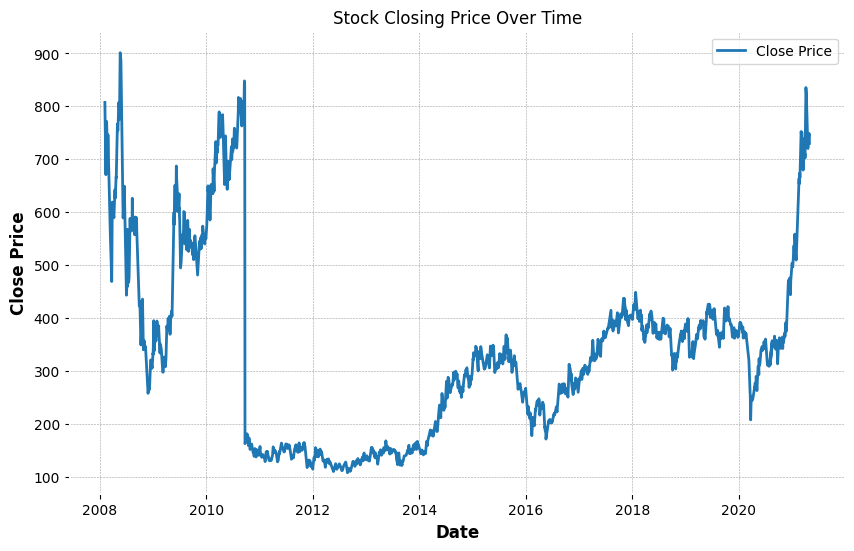

In [143]:
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Closing Price Over Time')
plt.legend()
plt.show()

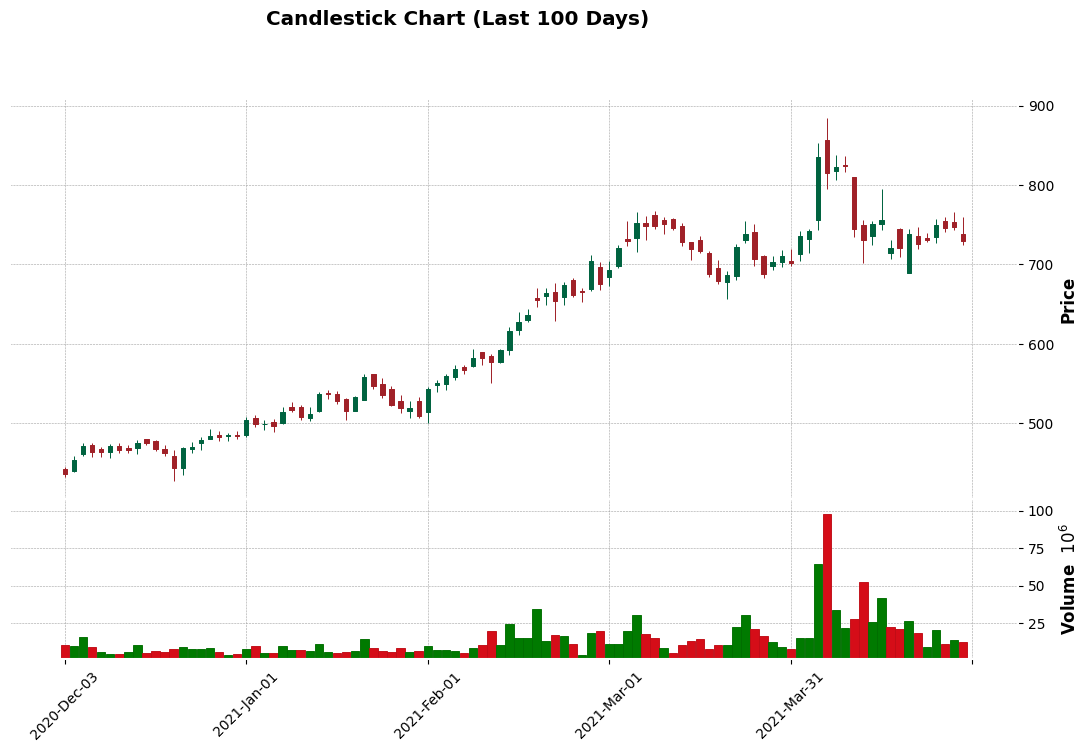

In [144]:
# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Select the required columns for the candlestick chart (including Volume)
df_candlestick = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Plot candlestick chart
mpf.plot(df_candlestick[-100:], type='candle', style='charles', title='Candlestick Chart (Last 100 Days)', 
         ylabel='Price', volume=True, figsize=(14,8))


In [145]:
df.columns

Index(['Symbol', 'Open', 'High', 'Low', 'Close', 'Volume', 'Turnover',
       'SMA_50', 'EMA_50', 'RSI_14', 'SMA_20', 'Bollinger_High',
       'Bollinger_Low', 'MACD', 'MACD_Signal', 'ATR'],
      dtype='object')

# Defining Trading Strategy

In [146]:
# Reset the index without dropping the 'Date' column
df.reset_index(inplace=True)

# Rename the default 'index' column back to 'Date' if you want to keep it named 'Date'
df.rename(columns={'index': 'Date'}, inplace=True)

# Assign a new index starting from 1
df.index = range(1, len(df) + 1)

In [147]:
# Initialize the Signal column (0 = No action, 1 = Buy, -1 = Sell)
df['Signal'] = 0

# Buy signal when RSI is below 30 (oversold condition)
df.loc[(df['RSI_14'] < 30), 'Signal'] = 1

# Sell signal when RSI is above 70 (overbought condition)
df.loc[(df['RSI_14'] > 70), 'Signal'] = 0

# Add Moving Average Crossover Strategy
# Buy when the 50-period SMA crosses above the 200-period SMA
df['SMA_200'] = df['Close'].rolling(window=200).mean()  # 200-period simple moving average

# Generate Buy/Sell signals based on SMA crossovers
df['SMA_Crossover_Buy'] = (df['SMA_50'] > df['SMA_200']) & (df['SMA_50'].shift(1) <= df['SMA_200'].shift(1))
df['SMA_Crossover_Sell'] = (df['SMA_50'] < df['SMA_200']) & (df['SMA_50'].shift(1) >= df['SMA_200'].shift(1))

# Combine the SMA crossover with the existing RSI signals
df.loc[df['SMA_Crossover_Buy'], 'Signal'] = 1  # Buy when SMA crossover condition met
df.loc[df['SMA_Crossover_Sell'], 'Signal'] = -1  # Sell when SMA crossover condition met


In [148]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume,Turnover,SMA_50,EMA_50,...,SMA_20,Bollinger_High,Bollinger_Low,MACD,MACD_Signal,ATR,Signal,SMA_200,SMA_Crossover_Buy,SMA_Crossover_Sell
1,2008-02-06,MUNDRAPORT,803.0,824.90,780.00,807.50,193260,15663794125000,1029.868,978.166019,...,904.4175,1132.162839,676.672161,-71.790481,-69.562935,69.870417,0,NaN,False,False
2,2008-02-07,MUNDRAPORT,825.0,830.00,792.00,796.25,212932,17237575975000,1026.535,971.032058,...,888.1525,1096.218983,680.086017,-71.497129,-69.949773,67.593958,0,NaN,False,False
3,2008-02-08,MUNDRAPORT,810.0,830.00,765.15,784.05,285025,22274252000000,1024.338,963.699428,...,873.0625,1063.814066,682.310934,-71.425731,-70.244965,67.397961,0,NaN,False,False
4,2008-02-11,MUNDRAPORT,785.0,785.00,695.00,711.20,223955,16488264325000,1020.878,953.797490,...,856.8650,1044.657826,669.072174,-76.367221,-71.469416,69.012393,1,NaN,False,False
5,2008-02-12,MUNDRAPORT,725.0,734.95,655.60,681.30,303409,20673577510000,1016.073,943.111314,...,838.4525,1018.761794,658.143206,-81.753662,-73.526265,69.750793,1,NaN,False,False


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3273 entries, 1 to 3273
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3273 non-null   datetime64[ns]
 1   Symbol              3273 non-null   object        
 2   Open                3273 non-null   float64       
 3   High                3273 non-null   float64       
 4   Low                 3273 non-null   float64       
 5   Close               3273 non-null   float64       
 6   Volume              3273 non-null   int64         
 7   Turnover            3273 non-null   int64         
 8   SMA_50              3273 non-null   float64       
 9   EMA_50              3273 non-null   float64       
 10  RSI_14              3273 non-null   float64       
 11  SMA_20              3273 non-null   float64       
 12  Bollinger_High      3273 non-null   float64       
 13  Bollinger_Low       3273 non-null   float64     

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb


In [151]:
# Step 1: Preprocess the Data
# Drop columns that are not needed for model training (e.g., 'Date', 'Symbol')
# We will predict based on technical indicators
X = df[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_50', 'EMA_50', 'RSI_14', 'Bollinger_High', 'Bollinger_Low', 'MACD', 'MACD_Signal', 'ATR', 'SMA_200', 'SMA_Crossover_Buy', 'SMA_Crossover_Sell']]

# Our target variable is 'Signal' (1 = Buy, -1 = Sell)
y = df['Signal']

# Convert -1 (Sell) to 0, and keep 1 (Buy) as is
y = y.replace({-1: 0})

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
# Step 3: Model Building using XGBoost
# Create and train the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [153]:
# Step 4: Model Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 99.3893
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       614
           1       1.00      0.90      0.95        41

    accuracy                           0.99       655
   macro avg       1.00      0.95      0.97       655
weighted avg       0.99      0.99      0.99       655



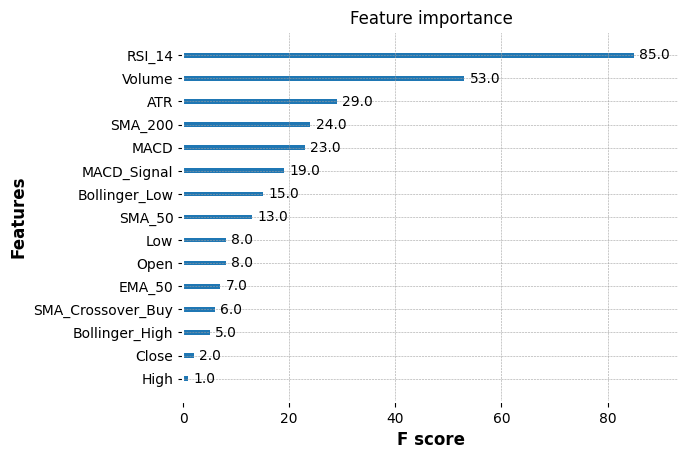

In [154]:
# Feature Importance
xgb.plot_importance(model)
plt.show()

In [155]:
from sklearn.model_selection import GridSearchCV

# Grid Search to find best parameters for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic'),
                           param_grid=param_grid, cv=5, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.4s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [156]:
# Train the model with the best parameters
best_model = grid_search.best_estimator_

# Fit the model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the performance of the model on the test data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100: .4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy:  99.3893
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       614
           1       1.00      0.90      0.95        41

    accuracy                           0.99       655
   macro avg       1.00      0.95      0.97       655
weighted avg       0.99      0.99      0.99       655



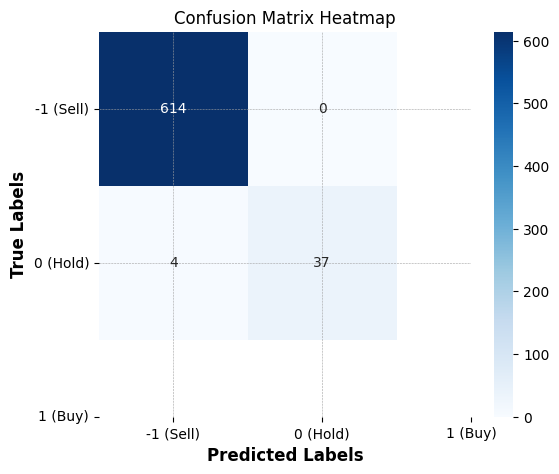

In [157]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Add labels and titles
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

# Set tick labels for x and y axes
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['-1 (Sell)', '0 (Hold)', '1 (Buy)'], rotation=0)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['-1 (Sell)', '0 (Hold)', '1 (Buy)'], rotation=0)

plt.show()


In [158]:
# Step 1: Prepare your data (assuming `df` contains columns 'Date', 'Open', 'High', 'Low', 'Close', 'Volume')

# Convert the 'Date' column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 2: Define your strategy
class MyStrategy(bt.Strategy):
    # Define parameters for the strategy
    params = (
        ('sma_period', 50),  # 50-day simple moving average
        ('rsi_period', 14),  # 14-day RSI
    )
    
    def __init__(self):
        # Define indicators
        self.sma = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.sma_period)
        self.rsi = bt.indicators.RelativeStrengthIndex(period=self.params.rsi_period)
        
    def next(self):
        if self.rsi < 30 and self.data.close > self.sma:  # Buy signal
            if not self.position:  # Only buy if not already in position
                self.buy()
        elif self.rsi > 70 or self.data.close < self.sma:  # Sell signal
            if self.position:  # Only sell if in position
                self.sell()

# Step 3: Set up the backtest
cerebro = bt.Cerebro()

# Add the strategy
cerebro.addstrategy(MyStrategy)

# Convert the dataframe to a Backtrader feed
data = bt.feeds.PandasData(dataname=df)

# Add data to the backtest
cerebro.adddata(data)

# Set initial cash and commission
cerebro.broker.set_cash(10000)  # Starting cash in USD
cerebro.broker.setcommission(commission=0.001)  # 0.1% commission per trade

# Set the time frame for the backtest
cerebro.addsizer(bt.sizers.FixedSize, stake=10)  # Use 10 shares per trade

# Step 4: Run the backtest
cerebro.run()

# Get the final portfolio value
final_value = cerebro.broker.getvalue()
print(f'Final Portfolio Value: Rs {final_value}')

Final Portfolio Value: Rs 10000.0


In [159]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for strategy parameters (you can adjust these based on your strategy)
param_grid = {
    'sma_period': [10, 20, 50, 100],   # Test different periods for the Simple Moving Average
    'rsi_period': [10, 14, 20],         # Test different periods for RSI
}

# Grid Search: GridSearchCV can't be used directly on Backtrader but we can manually loop through
# each set of parameters, backtest, and record performance

best_portfolio_value = 0
best_params = None

for sma_period in param_grid['sma_period']:
    for rsi_period in param_grid['rsi_period']:
        cerebro = bt.Cerebro()
        cerebro.addstrategy(MyStrategy, sma_period=sma_period, rsi_period=rsi_period)
        
        # Add data, set initial cash, etc.
        data = bt.feeds.PandasData(dataname=df)
        cerebro.adddata(data)
        cerebro.broker.set_cash(10000)
        cerebro.broker.setcommission(commission=0.001)
        cerebro.addsizer(bt.sizers.FixedSize, stake=10)
        
        # Run backtest
        cerebro.run()
        final_value = cerebro.broker.getvalue()
        
        # Update the best parameters and portfolio value if this set performs better
        if final_value > best_portfolio_value:
            best_portfolio_value = final_value
            best_params = {'sma_period': sma_period, 'rsi_period': rsi_period}

print("Best Parameters:", best_params)
print("Best Portfolio Value:", best_portfolio_value)


Best Parameters: {'sma_period': 50, 'rsi_period': 10}
Best Portfolio Value: 10000.0
